# Generating Data set

(100, 100)


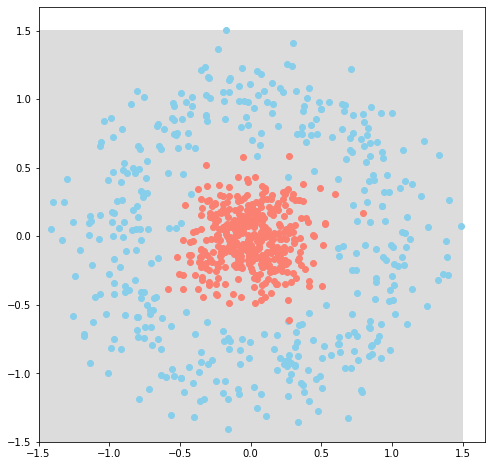

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#Creating an artificial dataset where will try to clasify 
#to rings with the same center
X, Y = make_circles(n_samples=800,factor=0.1,noise=0.2)

# Resolution of the predction map
res = 100

# Axis of the prediction map
_x0 = np.linspace(-1.5,1.5, res)
_x1 = np.linspace(-1.5,1.5, res)

# Input with every mix of coordinats of the prediction map
_pX = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

# Empty object at 0.5 of the prediction map
_pY = np.zeros((res,res))+0.5
print(_pY.shape)
# Visualization of the prediction map
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1, _pY, cmap="coolwarm",vmin=0,vmax=1)

#Visualization of the data
plt.scatter(X[Y == 0, 0],X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0],X[Y == 1, 1], c="salmon")

# Using Tensorflow

In [0]:
from matplotlib import animation
from IPython.core.display import display, HTML

import tensorflow as tf

# Creating entry points of data for the graph
iX = tf.placeholder('float',shape=[None, X.shape[1]])
iY = tf.placeholder('float',shape=[None])

nn = [2,16,8,1] # Number of neurons for layer
lr = 0.03 # learning rate of the optimizer    

In [0]:
# layer 1
W1 = tf.Variable(tf.random_normal([nn[0],nn[1]]),name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]),name ='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX,W1),b1))

# layer 2
W2 = tf.Variable(tf.random_normal([nn[1],nn[2]]),name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]),name ='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1,W2),b2))

# layer 3
W3 = tf.Variable(tf.random_normal([nn[2],nn[3]]),name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]),name ='bias_3')

#Prediction
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2,W3),b3))[:,0]

# Evaluation
loss = tf.losses.mean_squared_error(pY,iY)

# Creating the optimizir that will train the NN
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 1000 # Number of steps to train the NN

iPY = []

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Step  0 / 1000  - Loss =  0.38813478  - Acc  0.5725
Step  25 / 1000  - Loss =  0.35332024  - Acc  0.6325
Step  50 / 1000  - Loss =  0.3444748  - Acc  0.64375
Step  75 / 1000  - Loss =  0.338007  - Acc  0.64875
Step  100 / 1000  - Loss =  0.33245385  - Acc  0.6575
Step  125 / 1000  - Loss =  0.32725692  - Acc  0.6575
Step  150 / 1000  - Loss =  0.32205746  - Acc  0.665
Step  175 / 1000  - Loss =  0.3160627  - Acc  0.6675
Step  200 / 1000  - Loss =  0.30712608  - Acc  0.67625
Step  225 / 1000  - Loss =  0.2923442  - Acc  0.6875
Step  250 / 1000  - Loss =  0.27107185  - Acc  0.70125
Step  275 / 1000  - Loss =  0.22380298  - Acc  0.7325
Step  300 / 1000  - Loss =  0.1544581  - Acc  0.80125
Step  325 / 1000  - Loss =  0.11691539  - Acc  0.85625
Step  350 / 1000  - Loss =  0.09281662  - Acc  0.88
Step  375 / 1000  - Loss =  0.076586805  - Acc  0.8975
Step  400 / 1000  - Loss =  0.06568229  - Acc  0.9125
Step  425 / 1000  - Loss =  0.055938296  - Acc  0.925
Step  450 / 1000  - Loss =  0.04719

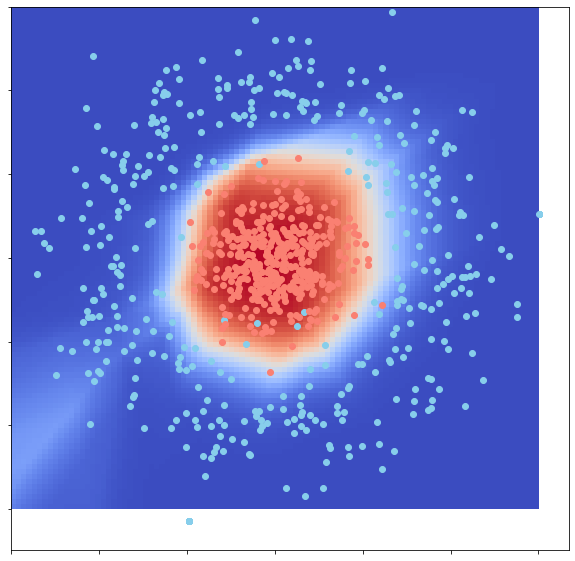

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(n_steps):
        _, _loss, _pY = sess.run([optimizer,loss, pY], feed_dict= {iX: X, iY: Y})

        if step % 25 == 0:

            acc = np.mean(np.round(_pY)==Y)

            print('Step ', step, '/', n_steps, ' - Loss = ', _loss, ' - Acc ', acc)
            
            # Predicting the classification of every _pX point
            _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

            # Saving to maken an animation
            iPY.append(_pY)
      
  
# Animation

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generating animation ---")

for fr in range(len(iPY)):
  
    im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualization of DATA
    plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
    plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Clasification Result")
    plt.tick_params(labelbottom=False, labelleft=False)

    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())
        
      

# Using Keras

In [25]:
import tensorflow.keras as kr

lr = 0.01
nn = [2,16,8,1]

# Creating the architecture of the neural network
model = kr.Sequential()

# Layer 1
model.add(kr.layers.Dense(nn[1], activation='relu'))

# Layer 2
model.add(kr.layers.Dense(nn[2], activation='relu'))

# Layer 3
model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compiling the model
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr),metrics=['acc'])

# Training the model
model.fit(X,Y, epochs = 250)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 800 samples
Epoch 1/250
800/800 [==============================] - 0s 270us/sample - loss: 0.2654 - acc: 0.4800
Epoch 2/250
800/800 [==============================] - 0s 36us/sample - loss: 0.2638 - acc: 0.4675
Epoch 3/250
800/800 [==============================] - 0s 36us/sample - loss: 0.2623 - acc: 0.4375
Epoch 4/250
800/800 [==============================] - 0s 38us/sample - loss: 0.2608 - acc: 0.3938
Epoch 5/250
800/800 [==============================] - 0s 33us/sample - loss: 0.2593 - acc: 0.3650
Epoch 6/250
800/800 [==============================] - 0s 42us/sample - loss: 0.2579 - acc: 0.3837
Epoch 7/250
800/800 [==============================] - 0s 36us/sample - loss: 0.2567 - acc: 0.3738
Epoch 8/250
800/800 [==============================] - 0s 41us/sample - loss: 0.2556 - acc: 0.3450
Epoch 9/250
800/800 [==============================] - 0s 39us/sample - loss: 0.2545 - acc: 0.3375
Epoch 

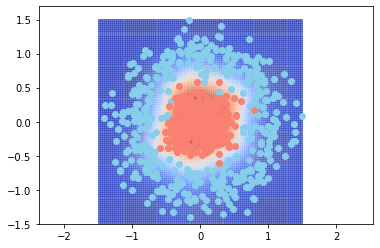

In [26]:
_x0 = np.linspace(-1.5,1.5, res)
_x1 = np.linspace(-1.5,1.5, res)

_Y = np.zeros((res,res))


for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _Y[i0,i1] = model.predict(np.array([[x0,x1]]))


plt.pcolormesh(_x0, _x1, _Y , cmap="coolwarm",alpha=0.7)
plt.axis("equal")

plt.scatter(X[Y == 0, 0],X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0],X[Y == 1, 1], c="salmon")
plt.show()

# Using Scikit Learn

In [23]:
import sklearn.neural_network as sknn

lr = 0.03  # learning rate
nn = [2, 16, 8, 1]

# Creating the object model
model = sknn.MLPClassifier(solver = 'sgd',
                          learning_rate_init = lr,
                          hidden_layer_sizes = nn[1:],
                          verbose = True,
                          n_iter_no_change = 1000,
                          max_iter = 1000,
                          activation = 'relu')

# Training model
model.fit(X,Y)

Iteration 1, loss = 0.71348138
Iteration 2, loss = 0.69870737
Iteration 3, loss = 0.68521457
Iteration 4, loss = 0.67764432
Iteration 5, loss = 0.66664070
Iteration 6, loss = 0.65603602
Iteration 7, loss = 0.64587727
Iteration 8, loss = 0.63342114
Iteration 9, loss = 0.61802494
Iteration 10, loss = 0.60040778
Iteration 11, loss = 0.57856760
Iteration 12, loss = 0.55272674
Iteration 13, loss = 0.51974279
Iteration 14, loss = 0.48115826
Iteration 15, loss = 0.44005600
Iteration 16, loss = 0.39586524
Iteration 17, loss = 0.35370316
Iteration 18, loss = 0.31628151
Iteration 19, loss = 0.28142320
Iteration 20, loss = 0.25111495
Iteration 21, loss = 0.22364164
Iteration 22, loss = 0.20010536
Iteration 23, loss = 0.18065869
Iteration 24, loss = 0.16447753
Iteration 25, loss = 0.15072061
Iteration 26, loss = 0.13967867
Iteration 27, loss = 0.12974027
Iteration 28, loss = 0.12129911
Iteration 29, loss = 0.11426211
Iteration 30, loss = 0.10819144
Iteration 31, loss = 0.10280873
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[16, 8, 1], learning_rate='constant',
              learning_rate_init=0.03, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=1000, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

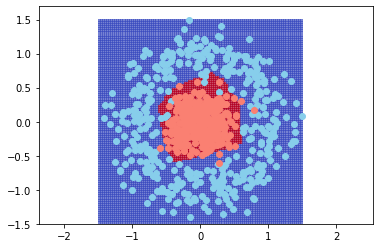

In [24]:
# Axis of the prediction map
_x0 = np.linspace(-1.5,1.5, res)
_x1 = np.linspace(-1.5,1.5, res)

_Y = np.zeros((res,res))


for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _Y[i0,i1] = model.predict(np.array([[x0,x1]]))


plt.pcolormesh(_x0, _x1, _Y , cmap="coolwarm",alpha=0.7)
plt.axis("equal")

plt.scatter(X[Y == 0, 0],X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0],X[Y == 1, 1], c="salmon")
plt.show()